In [1]:
import pandas as pd
data = pd.read_csv('movies.csv')
data.head()

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst..."


### Пояснения по столбцам:
- Rank: Рейтинг фильма по версии IMDB
- Title: Название фильма
- Year: Год выпуска
- Score: Рейтинг (10-бальный)
- Metascore: Метаскор (рейтинг 100-бальный)
- Genre: Жанр
- Vote: Количество голосов. 
- Director: Режиссер
- Runtime: Врем фильма
- Revenue: Выручка
- Description: Короткое описание (аннотация)

In [2]:
x = list(data['Revenue'].isnull()).count(True)
print('Количество пропусков =', x, str(round((x / len(data)) * 100, 2)) + '%')

Количество пропусков = 2527 25.27%


## Видим, что пропусков по revenue (прибыли) достаточно много (то есть 25 процентов), что равно примерно 1/4.

Давайте посмотрим на самые популярные фильмы по версии IMDB (топ 10):

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

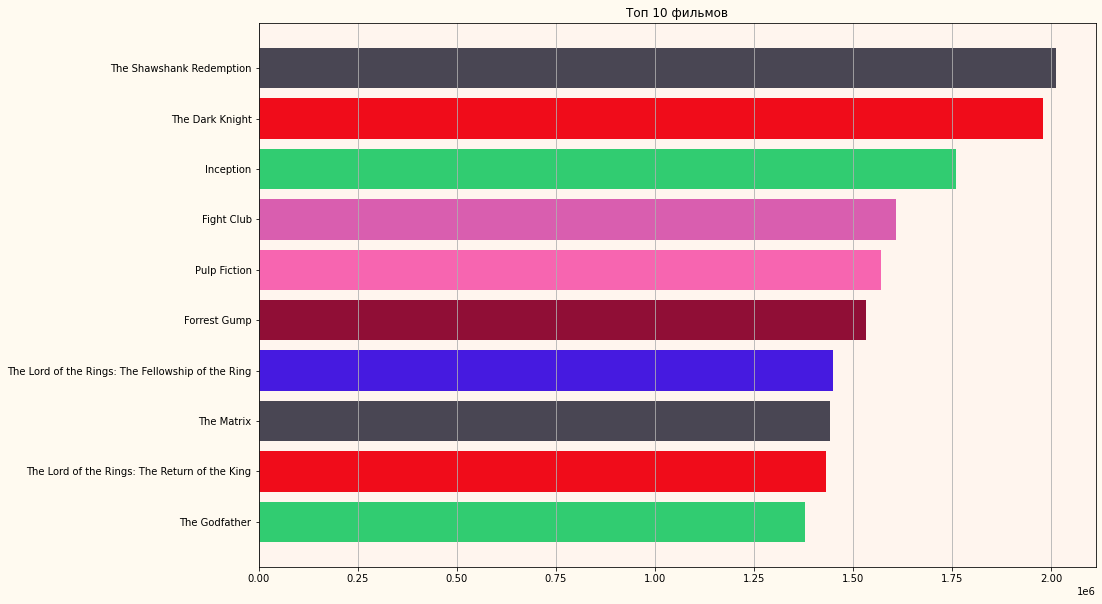

In [4]:
x = list(data[:10]['Title'])[::-1]
y = list(data[:10]['Vote'])[::-1]

fig, ax = plt.subplots()
plt.title('Топ 10 фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Вывод: Самый популярный фильм "Побег из Шоушенка" 2 миллиона голосов, на втором месте "The Dark Knight" c 1.98 миллиона голосов. Стоит отметить, что самые популярные фильмы также являеются лучшими фильмами в рейтинге пользователей многие годы.

## Далее посмотрим директоров фильмов, которые были наиболее популярны:

In [5]:
directors = data.groupby('Director')[['Vote']].sum()

In [6]:
top_directors = sorted(list(zip(directors['Vote'], directors.index)), reverse = True)[:10][::-1]
top_directors

[(4217093, 'Tim Burton'),
 (4447896, 'James Cameron'),
 (5208037, 'Robert Zemeckis'),
 (6171582, 'David Fincher'),
 (6262808, 'Ridley Scott'),
 (6623626, 'Peter Jackson'),
 (6774744, 'Martin Scorsese'),
 (6970578, 'Quentin Tarantino'),
 (10222671, 'Christopher Nolan'),
 (10354305, 'Steven Spielberg')]

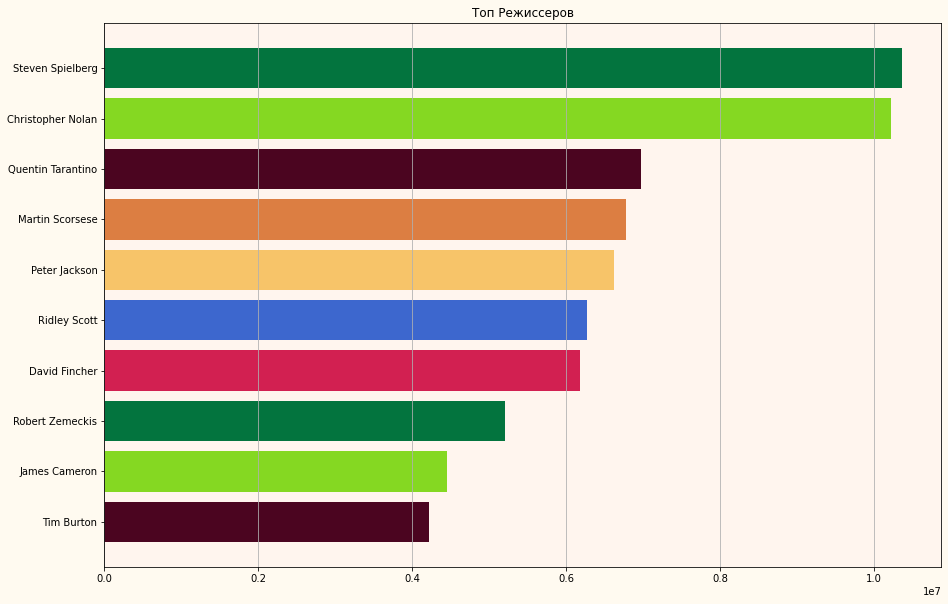

In [7]:
y = [t[0] for t in top_directors]
x = [t[1] for t in top_directors]

fig, ax = plt.subplots()
plt.title('Топ Режиссеров')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Вывод: Самый популярный режисер Стивен Спилберг. Его фильмы были оценены более 10 миллионов на IMDb. После с небольшим отставанием идет Кристофер Нолан. Стоит заметить, что в топ-10 самых популярных фильмов нет ни одного фильма Стивена Спилберга. Однако два фильма Кристофера Нолана (на 2-й и 3-й позициях). Режиссер самого популярного фильма "Побег из Шоушенка" (Фрэнк Дарабонт) находится только на 17-м месте.

## Посмотрим на самые длинные и короткие фильмы

In [8]:
films_time = sorted(list(zip(data['Runtime'], data['Title'])), reverse = True)[::-1]

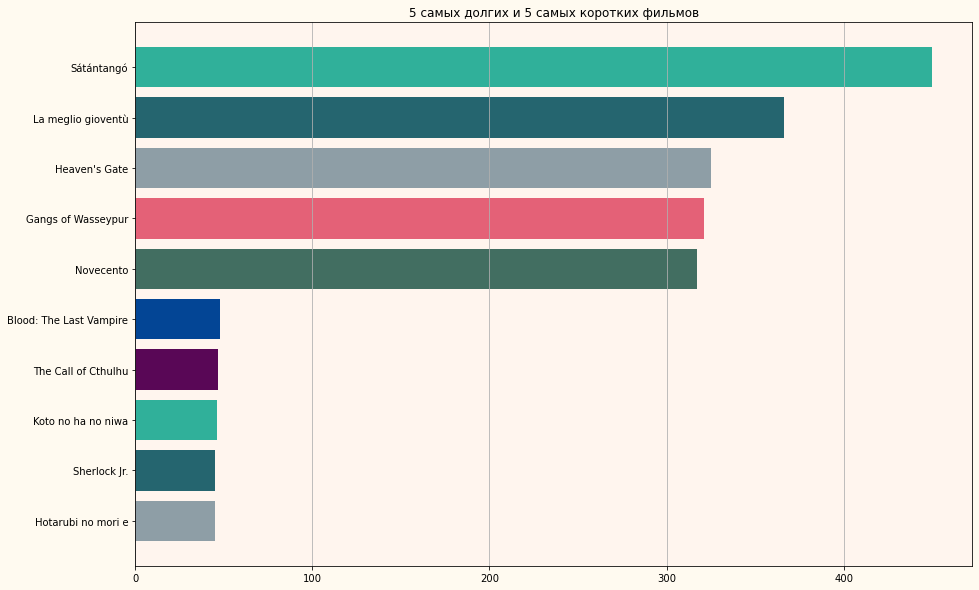

In [9]:
y = [t[0] for t in films_time[:5] + films_time[-5:]]
x = [t[1] for t in films_time[:5] + films_time[-5:]]

fig, ax = plt.subplots()
plt.title('5 самых долгих и 5 самых коротких фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Самый длинный фильм - это "Satantango" - Венгерский фильм 1994 года. Фильм идет 450 минут или 7 с половиной часов.
Самый короткий фильм это "Hotarubi no mori e" - японская анимация 2011 года. Эти фильмы не особо популярны (менее 10000 голосов).

# Посмотрим среднюю продолжительность:

In [34]:
runtime_by_genre = pd.pivot_table(data = data, values = 'Runtime', index = 'Genre', aggfunc = np.mean)
films_time = sorted(list(zip(list(runtime_by_genre['Runtime']), list(runtime_by_genre.index))), reverse = True)[::-1]
runtime_by_genre

,Runtime
Genre,
Action,127.300000
"Action, Adventure",111.761905
"Action, Adventure, Biography",125.285714
"Action, Adventure, Comedy",106.372263
"Action, Adventure, Crime",108.571429
...,...
"Thriller, Mystery",90.000000
"Thriller, War",109.500000
"Thriller, Western",93.000000


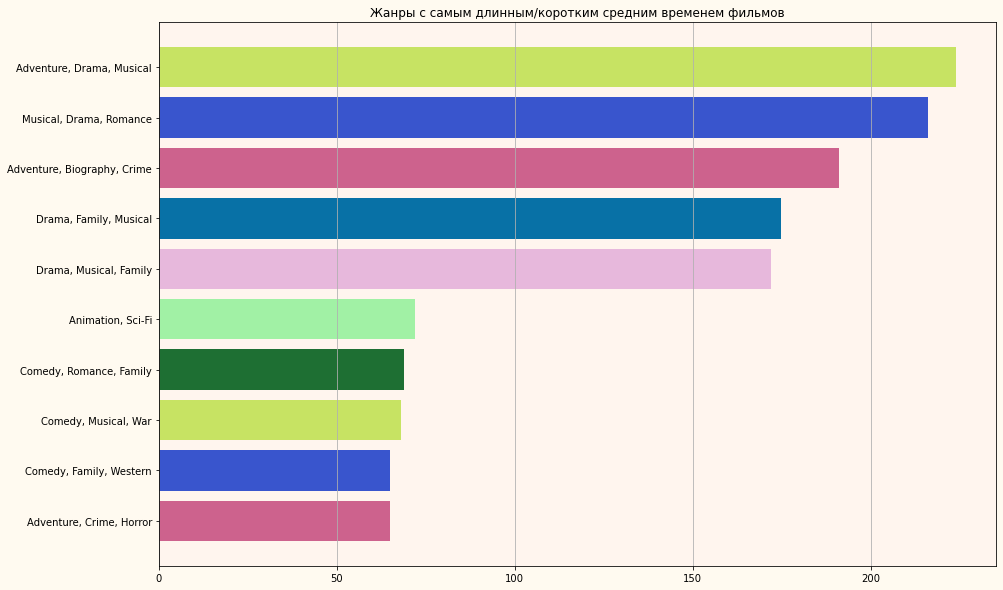

In [35]:
y = [t[0] for t in films_time[:5] + films_time[-5:]]
x = [t[1] for t in films_time[:5] + films_time[-5:]]

fig, ax = plt.subplots()
plt.title('Жанры с самым длинным/коротким средним временем фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.barh(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Вывод: в средней, самые долгие фильмы - это фильмы из жанров Приключения, Драма, Музыкальным. Среднее время почти 3 часа. Самые короткие фильмы относятся к жанру Приключения, Преступление, Хоррор или Комедии, Семейные, Вестерн. Эти наборы жанров разные, но имеют одинаковое среднее время равно 1 часу и 5 минутам.

# Распределение количества фильмов по датам: 

In [39]:
count_by_year = pd.pivot_table(data = data, values = 'Title', index = 'Year', aggfunc = len)
count = sorted(list(zip(list(count_by_year.index), list(count_by_year['Title']))), reverse = True)[::-1]

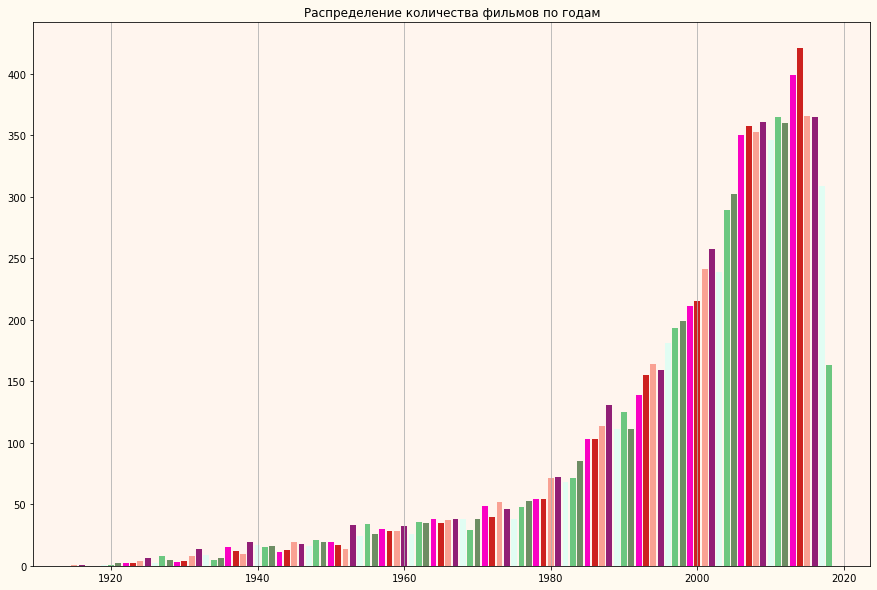

In [38]:
y = [t[1] for t in count]
x = [t[0] for t in count]

fig, ax = plt.subplots()
plt.title('Распределение количества фильмов по годам')

color_rectangle = np.random.rand(7, 3)  
ax.bar(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

По данному графику видно сильное смещение к 2000-2020 годам.Старые фильмы редко попадают в базу 1000 самых популярных фильмов.

# Посмотрим распределение рейтингов (IMDB score и Metascore)

In [40]:
data['bucketIMDB'] = [int(x) for x in list(data['Score'])]
data['bucketMetascore'] = [x // 10 * 10 for x in list(data['Metascore'])]
data.head() 

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,bucketIMDB,bucketMetascore
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,9,80.0
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,9,80.0
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,8,70.0
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,8,60.0
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",8,90.0


In [44]:
IMDB_pivot = pd.pivot_table(data = data, values = 'Title', index = 'bucketIMDB', aggfunc = len)
IMDB_count = sorted(list(zip(list(IMDB_pivot .index), list(IMDB_pivot ['Title']))), reverse = True)[::-1]

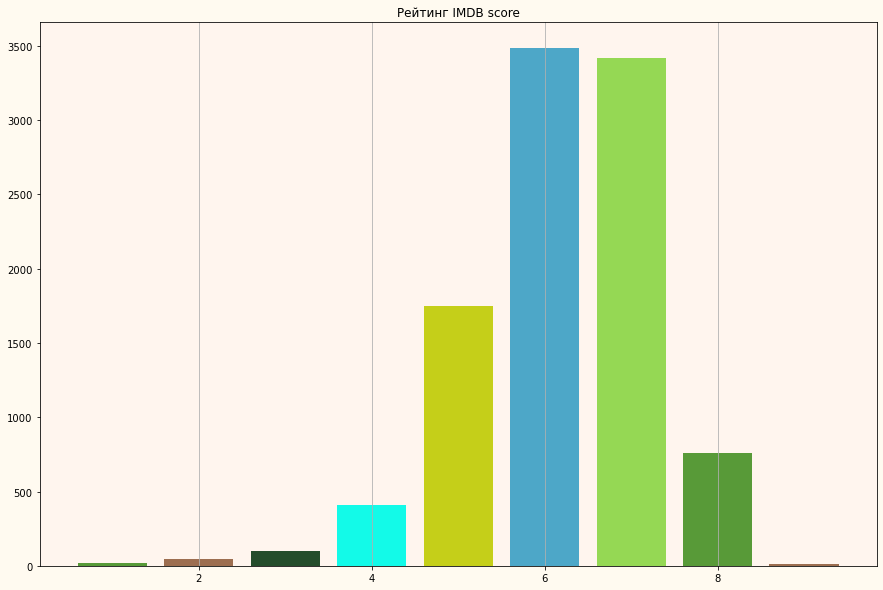

In [47]:
y = [t[1] for t in IMDB_count]
x = [t[0] for t in IMDB_count]

fig, ax = plt.subplots()
plt.title('Рейтинг IMDB score')

color_rectangle = np.random.rand(7, 3)  
ax.bar(x, y, color = color_rectangle, align = 'center')
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Отзывы пользователей - это один из самых выжных параметров сайта. Срейдий рейтинг составляет 6.62. Большинство рейтингов находится от 6 до 8.

In [48]:
Metascore_pivot = pd.pivot_table(data = data, values = 'Title', index = 'bucketMetascore', aggfunc = len)
Metascore_count = sorted(list(zip(list(Metascore_pivot.index), list(Metascore_pivot['Title']))), reverse = True)[::-1]

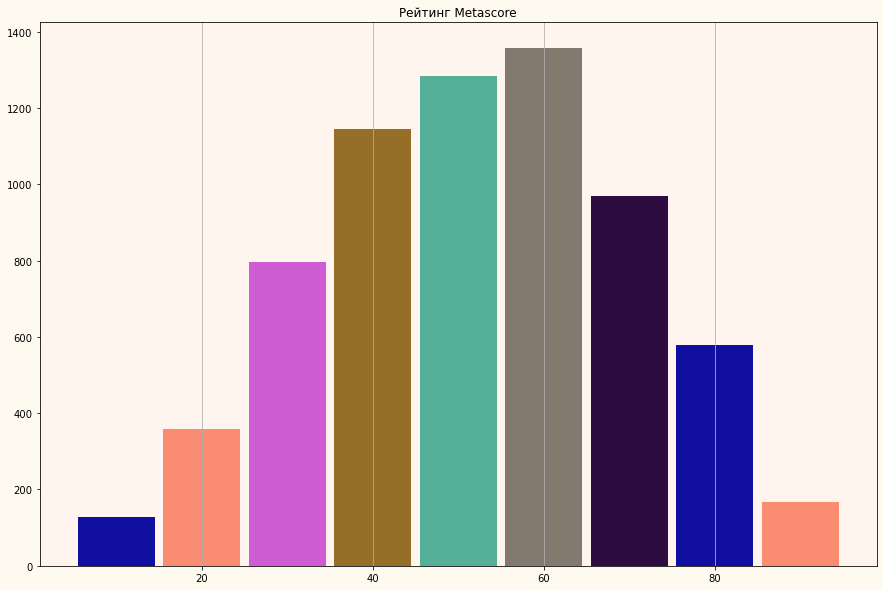

In [53]:
y = [t[1] for t in Metascore_count]
x = [t[0] for t in Metascore_count]

fig, ax = plt.subplots()
plt.title('Рейтинг Metascore')

color_rectangle = np.random.rand(7, 3)  
ax.bar(x, y, color = color_rectangle, align = 'center', width = 9)
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Рейтинг Metascore находится в разбросе от 0 до 100. Средний рейтинг фильмов по Metascore составляет 56.5. Видно, что распределение также симметрично (то есть пользователи в среднем склоняются к некотором среднему варианту). Кажется, что пользователи, оставившие рейтинг Metascore, оценивали фильмы более категорично.

# Посмотрим на распределение времени по всем фильмам и на распределение прибыли:

In [71]:
data['bucketTime'] = [x // 25 * 25 for x in list(data['Runtime'])]
data['bucketIncome'] = [int(x) // 10 * 10 for x in list(data['Revenue'].fillna(0))]
data.head() 

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,bucketIMDB,bucketMetascore,bucketTime,bucketIncome
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,9,80.0,125,20
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,9,80.0,150,530
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,8,70.0,125,290
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,8,60.0,125,30
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",8,90.0,150,100


In [76]:
Time_pivot = pd.pivot_table(data = data, values = 'Title', index = 'bucketTime', aggfunc = len)
Time_count = sorted(list(zip(list(Time_pivot.index), list(Time_pivot['Title']))), reverse = True)[::-1]

Income_pivot =  pd.pivot_table(data = data, values = 'Title', index = 'bucketIncome', aggfunc = len)
Income_count = sorted(list(zip(list(Income_pivot.index), list(Income_pivot['Title']))), reverse = True)[::-1]

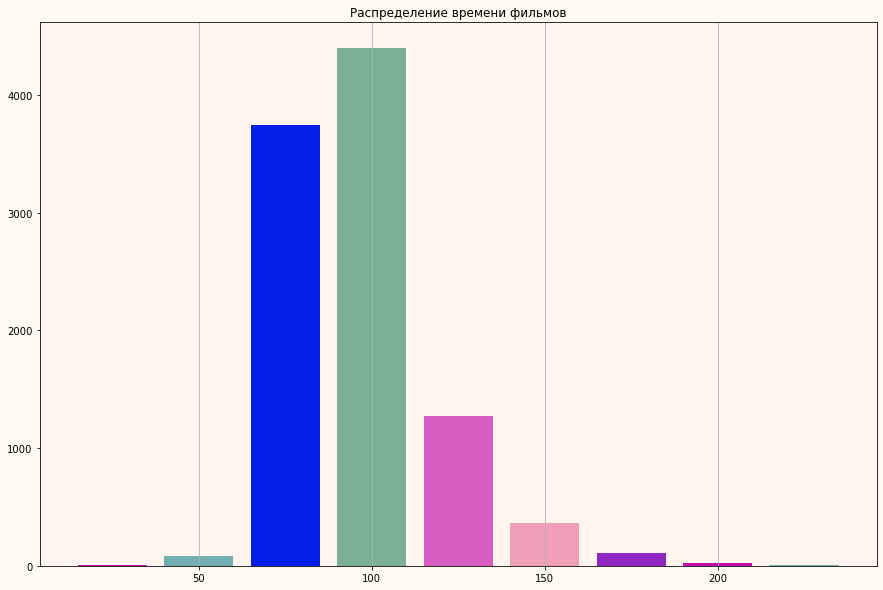

In [74]:
y = [t[1] for t in Time_count[:-5]]
x = [t[0] for t in Time_count[:-5]]

fig, ax = plt.subplots()
plt.title('Распределение времени фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.bar(x, y, color = color_rectangle, align = 'center', width = 20)
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Фильмы в базе данных имеют средюю продолжительность 108.7 минут (примерно 1 час и 49 минут). Большинство фильмов имеют продолжительность от 75 до 135 минут. 

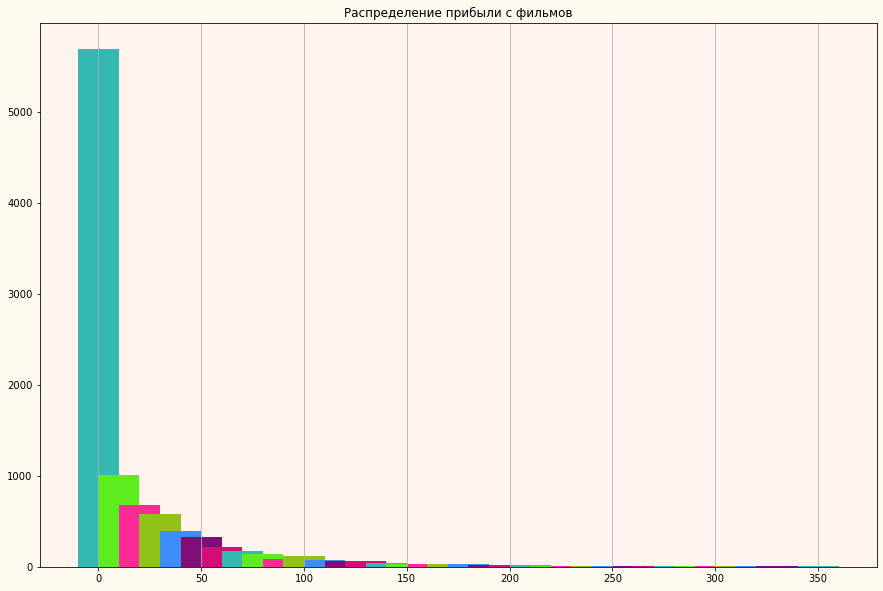

In [80]:
y = [t[1] for t in Income_count[:-20]]
x = [t[0] for t in Income_count[:-20]]

fig, ax = plt.subplots()
plt.title('Распределение прибыли с фильмов')

color_rectangle = np.random.rand(7, 3)  
ax.bar(x, y, color = color_rectangle, align = 'center', width = 20)
ax.xaxis.grid(True, zorder = 1)
xs = range(len(data.columns))

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Выручка с фильмов характеризуется сильным смещением к нулю. Большая часть фильмов имеют маленькую выручку, и только маленькая часть фильмов имеет действительно большую выручку. Средняя выручка с фильмов составляет 36 миллионов долларов.

# Посмотрим корреляцию параметров между собой:

Корреляция - это величина, которая измеряется от -1 до 1 и показывает на сколько сильно две величины зависимы друг от друга (Чем больше, тем сильнее зависимость) 

In [81]:
import seaborn as sn

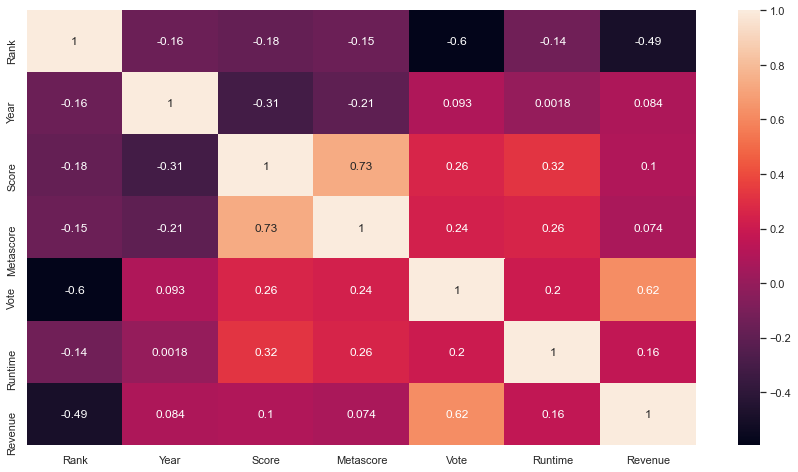

In [90]:
corr_matrix = data[['Rank','Year', 'Score', 'Metascore', 'Genre', 'Vote', 'Runtime', 'Revenue']].corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_matrix, annot=True)
pass

Видна сильная положительная корреляция между metascore и IMDb рейтингов и между числом голосов и прибылью. Сильная отрицательная корреляция видна между рейтингов и количеством голосов и прибылью и местом в рейтинге. 

## Цели /  Задачи /  Актуальность темы / Ресурсы откуда брали информацию / Программы

## Цель: Формула прибыльного кино: что влияет на успешность фильмов?

Я очень долгое время интересуюсь киноиндустрией. Обращаю внимание в большей мере не на новинки, которые выхоядт в прокат, а на комерческую составляющую проектов. Я всегда задавалась вопросом, что влияет на успешность фильма? Высокие сборы - это заслуга только режиссера или слаженной командной работы? 

Несомненно, над подготовкой фильмов сейчас всегда работает большое количество специлистов. Часть из них отвечает за креативную работу, а другая часть отвечает за продакшн, маркетинг и так далее. Я захотела понять, на что в первую очередь сейчас необходимо обращать внимание при создании фильма, чтобы он был комерчески успешен?

Для этого я взяла данные с сайта IMDB: https://www.kaggle.com/isaactaylorofficial/imdb-10000-most-voted-feature-films-041118. Я хочу сделать численную аналитику с визуализацией результатов для более системного ответа на вышепоставленный вопрос.


## Задачи: 
1. Выделить основные параметры, которые влияют на комерческую успешность фильмов.
2. Определить примеры комерчески успешных фильмов, которые имеет смысл изучить в качестве примеров. Также уделить внимание рейтингу лучших режиссеров.
3. Определить среднюю выручку фильмов на основе приведенных данных из рейтинга IMDB.
4. Оценить рейтинговую систему IMDB и поведение пользователей.

## Актуальность темы:
<i>Сюда можно вставить график "Распределение количества фильмов по годам"(1)</i>

Каждый день в прокат выходят новые и новые фильмы. По графику (1) виден кратный рост фильмов, выходящих в видеопрокат с течением времени. Также и капитализация киноиндустрии в целом значительно увеличивается от года к году. Очевидно, что успешный фильм в наше время требует долгой подготовки и аналитики. Именно поэтому данный проект имеет высокую актуальность именно сейчас.

## Выводы: 
1. Самыми популярными фильмами по версии IMDB являются: "Побег из Шоушенка","Тёмный рыцарь", "Начало", "Бойцовский клуб", "Криминальное чтиво". Самый популярный фильм "Побег из Шоушенка" имеет более 2 миллинов голосов. Стоит отметить, что самые популярные фильмы также являеются лучшими фильмами в рейтинге пользователей многие годы. Имеет смысл досконально изучить кассовые фильмы предыдущих десятилетий. Но стоит заметить, что далеко не все старые фильмы попадают в базу 1000 самых популярных фильмов. Новые фильмы более популярны, чем старые.

2. Самым популярным режисером по версии IMDB является Стивен Спилберг. Его фильмы были оценены более 10 миллионов раз на IMDb. Стоит заметить, что в топ-10 самых популярных фильмов нет ни одного фильма Стивена Спилберга. 

3. Средний рейтинг пользователей находится от 5 до 7 по десятибальной шкале. Видно, что распределение также симметрично (то есть пользователи в среднем склоняются к некотором среднему варианту при оценке фильмов). Также стоит отметить, что количество отзывов пользователей - это один из самых выжных параметров сайта, который влияет на выдачу фильмов в рейтинге. Стоит заметить, что не все фильмы с хорошим рейтингом приносят большие доходы или большое количество голосов.

4. Фильмы, которые сильно отличаются отличаются в большую или меньшую сторону по времени не особо популярны (имеют менее 10000 голосов). Самые популярные фильмы длятся от 90 до 120 минут. Существует большая разница между максимальным и минимальным временем просмотра популярных фильмов, а также средним рейтингом.

5. В среднем самые долгие фильмы - это фильмы из жанров Приключения, Драма, Музыкальные. Среднее время составляет почти 3 часа. Самые короткие фильмы относятся к жанру Приключения, Преступления, Хоррор или Комедии, Семейные, Вестерн. Эти жанры разные, но имеют одинаковое среднее время равное 1 часу и 5 минутам.

6. Выручка фильмов характеризуется сильным смещением к нулю. Большая часть фильмов имеют маленькую выручку и только несколько фильмов имеют высокие доходы. Средняя выручка с фильмов составляет 36 миллионов долларов.

## Ресуры:
- https://www.kaggle.com/isaactaylorofficial/imdb-10000-most-voted-feature-films-041118 (данные)

## Программы:
- Jupyter Notebook (Python)
- Библиотеки: pandas, pyplot, numpy, seaborn